In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import mesaPlot as mp
import pandas as pd
from custom_mpl_settings import load_mpl_rc
load_mpl_rc()
cmap = plt.get_cmap('viridis')
m = mp.MESA()
from functions import add_Teff

In [5]:
np.arange(-5.25,100,0.5)

array([-5.25, -4.75, -4.25, -3.75, -3.25, -2.75, -2.25, -1.75, -1.25,
       -0.75, -0.25,  0.25,  0.75,  1.25,  1.75,  2.25,  2.75,  3.25,
        3.75,  4.25,  4.75,  5.25,  5.75,  6.25,  6.75,  7.25,  7.75,
        8.25,  8.75,  9.25,  9.75, 10.25, 10.75, 11.25, 11.75, 12.25,
       12.75, 13.25, 13.75, 14.25, 14.75, 15.25, 15.75, 16.25, 16.75,
       17.25, 17.75, 18.25, 18.75, 19.25, 19.75, 20.25, 20.75, 21.25,
       21.75, 22.25, 22.75, 23.25, 23.75, 24.25, 24.75, 25.25, 25.75,
       26.25, 26.75, 27.25, 27.75, 28.25, 28.75, 29.25, 29.75, 30.25,
       30.75, 31.25, 31.75, 32.25, 32.75, 33.25, 33.75, 34.25, 34.75,
       35.25, 35.75, 36.25, 36.75, 37.25, 37.75, 38.25, 38.75, 39.25,
       39.75, 40.25, 40.75, 41.25, 41.75, 42.25, 42.75, 43.25, 43.75,
       44.25, 44.75, 45.25, 45.75, 46.25, 46.75, 47.25, 47.75, 48.25,
       48.75, 49.25, 49.75, 50.25, 50.75, 51.25, 51.75, 52.25, 52.75,
       53.25, 53.75, 54.25, 54.75, 55.25, 55.75, 56.25, 56.75, 57.25,
       57.75, 58.25,

In [2]:
evol_phase = 'MS'
metallicity = 0.02
table_name = "tracks_Z%7.2e_%s.csv" %(float(metallicity),evol_phase)
table_filepath = os.path.join(f'/Users/natalierees/MINT_grids_23051/Z{metallicity}/{evol_phase}',table_name)
df = pd.read_csv(table_filepath,index_col=[0])
df = add_Teff(df)
df = df[df['WARNING_FLAG']==0]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11266 entries, 78 to 0
Data columns (total 39 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   MASS                                       11266 non-null  float64
 1   CENTRAL_HYDROGEN                           11266 non-null  float64
 2   RADIUS                                     11266 non-null  float64
 3   LUMINOSITY                                 11266 non-null  float64
 4   LUMINOSITY_DIV_EDDINGTON_LUMINOSITY        11266 non-null  float64
 5   NEUTRINO_LUMINOSITY                        11266 non-null  float64
 6   AGE                                        11266 non-null  float64
 7   HELIUM_CORE_MASS_FRACTION                  11266 non-null  float64
 8   CENTRAL_DEGENERACY                         11266 non-null  float64
 9   CONVECTIVE_CORE_MASS_FRACTION              11266 non-null  float64
 10  CONVECTIVE_CORE_RADIUS_FR

In [4]:
df['CENTRAL_HYDROGEN'].min()

1e-12

No handles with labels found to put in legend.
No handles with labels found to put in legend.


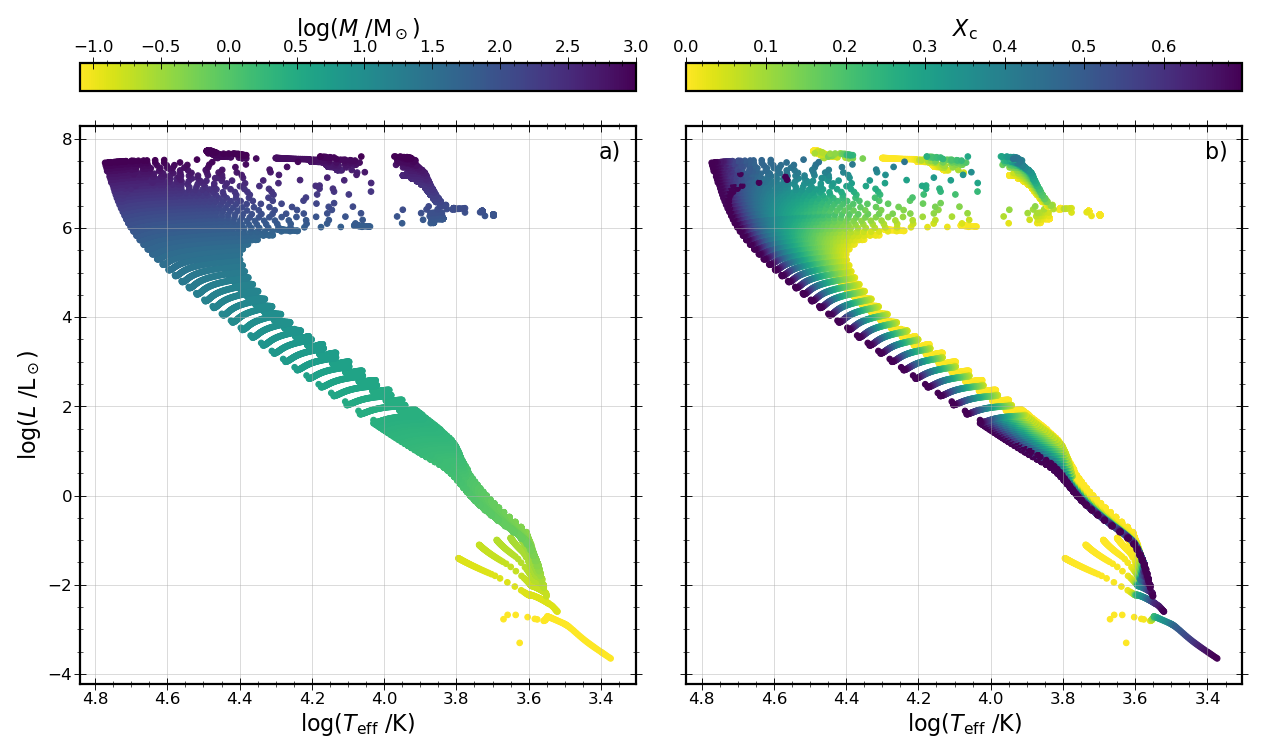

In [3]:
fig,ax=plt.subplots(1,2,figsize=(16,10),sharey=True)

sc1 = ax[0].scatter(np.log10(df['EFFECTIVE_TEMPERATURE']),np.log10(df['LUMINOSITY']),c=np.log10(df['MASS']),cmap=cmap.reversed())
sc2 = ax[1].scatter(np.log10(df['EFFECTIVE_TEMPERATURE']),np.log10(df['LUMINOSITY']),c=df['CENTRAL_HYDROGEN'],cmap=cmap.reversed())
ax[0].invert_xaxis()
ax[1].invert_xaxis()
cbar = plt.colorbar(sc1,ax=ax[0],location='top',label='$\log(M~/\mathrm{M}_\odot)$')
cbar = plt.colorbar(sc2,ax=ax[1],location='top',label='$X_\mathrm{c}$')
ax[0].set(xlabel='$\log (T_\mathrm{eff}~/\mathrm{K})$',ylabel='$\log (L~/\mathrm{L}_\odot)$')
ax[1].set(xlabel='$\log (T_\mathrm{eff}~/\mathrm{K})$')
ax[0].legend(title='a)',frameon=False)
ax[1].legend(title='b)',frameon=False)
fig.tight_layout()
plt.savefig(f'plots/Z{metallicity}_{evol_phase}_HR.jpeg',dpi=200)
plt.show()

In [7]:
0.165/2.7

0.06111111111111111

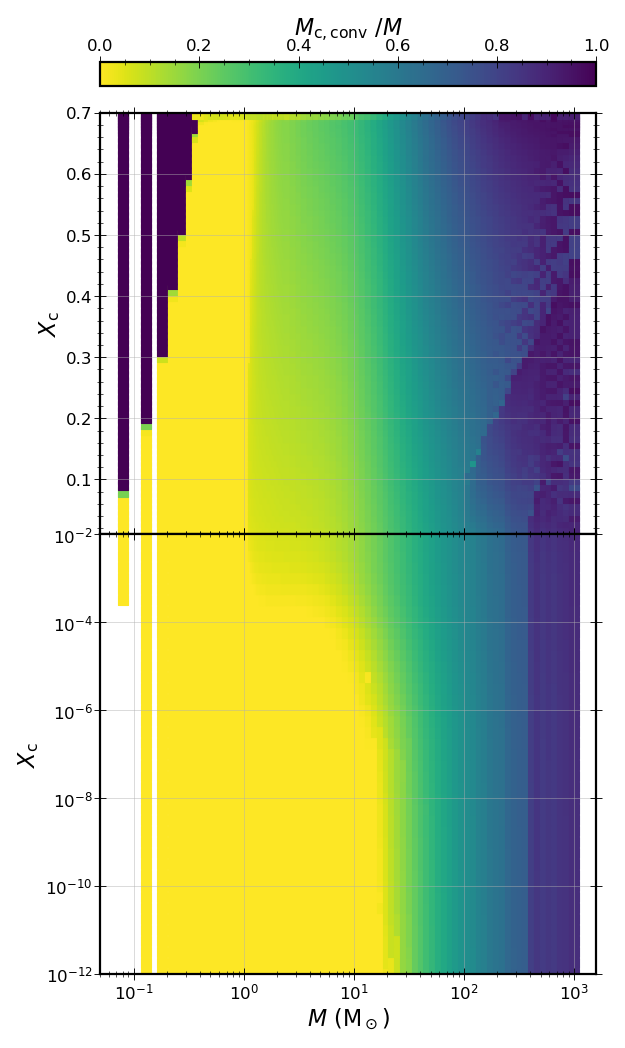

In [82]:
fig,ax=plt.subplots(2,1,figsize=(8,16),sharex=True,gridspec_kw={'height_ratios':[1.2,1]})
sc = ax[0].scatter(df['MASS'],df['CENTRAL_HYDROGEN'],c=df['CONVECTIVE_CORE_MASS_FRACTION'],s=80,marker='s',cmap=cmap.reversed())
sc = ax[1].scatter(df['MASS'],df['CENTRAL_HYDROGEN'],c=df['CONVECTIVE_CORE_MASS_FRACTION'],s=80,marker='s',cmap=cmap.reversed())
cbar = plt.colorbar(sc,ax=ax[0],location='top',label='$M_\mathrm{c,conv}~/M$')
ax[0].set(ylabel='$X_\mathrm{c}$')
ax[1].set(xlabel='$M~(\mathrm{M}_\odot)$',ylabel='$X_\mathrm{c}$')
ax[0].set_xscale('log')
ax[1].set_yscale('log')
ax[0].set_ylim(0.01,0.7)
ax[1].set_ylim(1e-12,0.01)

# fig.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig(f'plots/Z{metallicity}_{evol_phase}_conv_core_mass.jpeg',dpi=200)
plt.show()